# Klasyfikacja (dodatkowe zadania)
## Zadania
1. Wczytaj zbiory `wdbc.data`, `Dry_Bean_Dataset.xlsx`. Użyj walidacji krzyżowej aby wybrać najlepszy klasyfikator. 
    - Skaluj dane `minmax_scale()`.
    - Podziel zbiory na zbiór treningowy i testowy.
    - Porównaj klasyfikatory: `LinearDiscriminantAnalysis`, `QuadraticDiscriminantAnalysis`, `GaussianNB`, `LogisticRegression`, `KNeighborsClassifier`.
    - Do ewaluacji modeli można użyć metod [`cross_val_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html) lub [`cross_validate()`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html#sklearn.model_selection.cross_validate).
    - Po wyborze najlepszego modelu, trenuj go za pomocą całego zbioru treningowego. Użyj wydzielonego wcześniej zbioru testowego aby ewaluować model (podaj dokładność i inne miary).
2. Dla zbiorów z Zadania 1, użyj walidacji krzyżowej aby dobrać najlepszą wartośc parametru `n_neighbors` dla `KNeighborsClassifier`.
    - Proces można zaimplementować manualnie (np. w pętli), lub użyć [`GridSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).
    - Stwórz wykres pokazujący zależność średniej dokładności od `n_neighbors`.
    - Po wyborze najlepszego modelu, trenuj go za pomocą całego zbioru treningowego. Użyj wydzielonego wcześniej zbioru testowego aby ewaluować model (podaj dokładność i inne miary).

In [44]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

wdbc = pd.read_csv("wdbc.data")
X = wdbc.drop(columns="diagnosis")
y = wdbc.diagnosis

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [45]:
from sklearn.preprocessing import minmax_scale

X_train_scaled = minmax_scale(X_train)


In [46]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

knn_cv = KNeighborsClassifier(n_neighbors=4)

cross_scores = cross_val_score(knn_cv, X_train_scaled, y_train, cv=10)
print(cross_scores)
cross_scores.mean()

[0.92307692 0.94736842 0.92105263 1.         0.97368421 0.94736842
 1.         0.97368421 0.97368421 1.        ]


0.965991902834008

In [47]:
from sklearn.model_selection import GridSearchCV

knn2 = KNeighborsClassifier()
param_grid = {"n_neighbors": np.arange(1, 25)}
knn_gscv = GridSearchCV(knn2, param_grid, cv=5)
knn_gscv.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])})

In [48]:
knn_gscv.best_params_, knn_gscv.best_score_

({'n_neighbors': 3}, 0.963362952836637)

In [49]:
knn_gscv.cv_results_['mean_test_score']

array([0.96073137, 0.94497608, 0.96336295, 0.95806562, 0.95809979,
       0.95543404, 0.9606972 , 0.95809979, 0.96332878, 0.95020506,
       0.95543404, 0.95276828, 0.95543404, 0.9475393 , 0.95017088,
       0.95020506, 0.95020506, 0.95020506, 0.95283664, 0.95020506,
       0.94757348, 0.94757348, 0.95283664, 0.94757348])

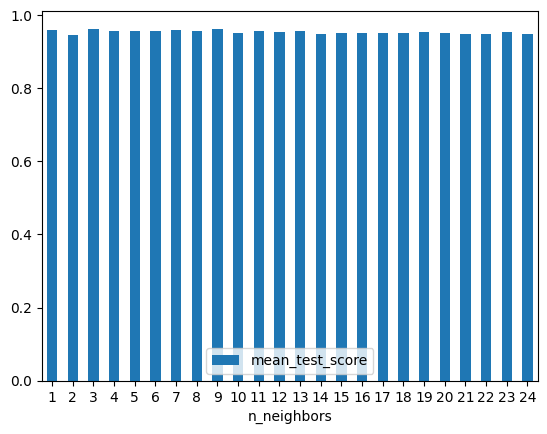

In [50]:
df = pd.DataFrame({'n_neighbors': np.arange(1, 25),
                  'mean_test_score': knn_gscv.cv_results_['mean_test_score']})
ax = df.plot.bar(x='n_neighbors', y='mean_test_score', rot=0)

In [51]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(store_covariance=True)
cross_scores = cross_val_score(lda, X_train_scaled, y_train, cv=10)
print(cross_scores)
cross_scores.mean()

[0.92307692 0.89473684 0.97368421 1.         1.         0.92105263
 0.97368421 0.97368421 0.94736842 1.        ]


0.9607287449392713

In [52]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
qda = QDA(store_covariance=True)
cross_scores = cross_val_score(qda, X_train_scaled, y_train, cv=10)
print(cross_scores)
cross_scores.mean()

[0.8974359  0.92105263 0.94736842 0.97368421 0.97368421 0.97368421
 1.         1.         0.97368421 0.92105263]


0.9581646423751685

In [53]:
from sklearn.naive_bayes import GaussianNB

NB = GaussianNB()
cross_scores = cross_val_score(NB, X_train_scaled, y_train, cv=10)
print(cross_scores)
cross_scores.mean()

[0.8974359  0.89473684 0.92105263 0.94736842 0.92105263 0.92105263
 0.94736842 0.97368421 0.94736842 0.97368421]


0.9344804318488528

In [54]:
from sklearn.linear_model import LogisticRegression

logit = LogisticRegression(C=1e10, solver='liblinear')
cross_scores = cross_val_score(logit, X_train_scaled, y_train, cv=10)
print(cross_scores)
cross_scores.mean()

[0.94871795 0.86842105 0.97368421 0.97368421 1.         0.94736842
 0.94736842 0.92105263 0.92105263 0.97368421]


0.9475033738191632

In [55]:
from sklearn.metrics import classification_report

# best model so far
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled, y_train)
X_test_scaled = minmax_scale(X_test)
y_pred = knn.predict(X_test_scaled)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           B       0.97      0.89      0.93       123
           M       0.83      0.95      0.89        65

    accuracy                           0.91       188
   macro avg       0.90      0.92      0.91       188
weighted avg       0.92      0.91      0.92       188



In [56]:
from sklearn.metrics import confusion_matrix

tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
[[tp, fp], [fn, tn]]

[[62, 13], [3, 110]]

In [57]:
db = pd.read_excel("Dry_Bean_Dataset.xlsx")
X = db.drop(columns="Class")
y = db.Class

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [58]:
X_train_scaled = minmax_scale(X_train)

In [59]:
knn = KNeighborsClassifier()
param_grid = {"n_neighbors": np.arange(1, 50)}
knn_gscv = GridSearchCV(knn, param_grid, cv=5)
knn_gscv.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [60]:
knn_gscv.best_params_, knn_gscv.best_score_

({'n_neighbors': 30}, 0.9199464565830373)

In [61]:
knn_gscv.cv_results_['mean_test_score']

array([0.8998782 , 0.89428616, 0.91599897, 0.91435441, 0.91720529,
       0.91797277, 0.91819183, 0.91885021, 0.91797313, 0.91753406,
       0.91775353, 0.91917867, 0.91906902, 0.91928814, 0.91884985,
       0.91917867, 0.91797259, 0.91950774, 0.91863067, 0.91906914,
       0.91863037, 0.91884972, 0.91939815, 0.91906902, 0.91939803,
       0.91917873, 0.91797265, 0.91895943, 0.91852102, 0.91994646,
       0.91917891, 0.9197271 , 0.91972716, 0.91884985, 0.91731464,
       0.91852102, 0.91764383, 0.91841149, 0.91819213, 0.91720517,
       0.91775335, 0.91687616, 0.91742441, 0.91676645, 0.91720517,
       0.91643744, 0.91665674, 0.91632786, 0.91621827])

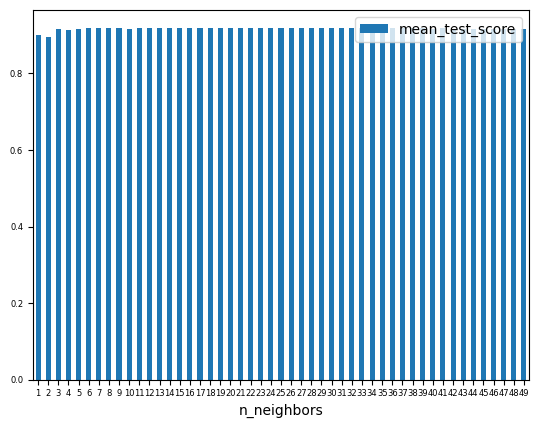

In [62]:
df = pd.DataFrame({'n_neighbors': np.arange(1, 50),
                  'mean_test_score': knn_gscv.cv_results_['mean_test_score']})
ax = df.plot.bar(x='n_neighbors', y='mean_test_score', rot=0, fontsize=6)

In [63]:
knn_cv = KNeighborsClassifier(n_neighbors=30)

cross_scores = cross_val_score(knn_cv, X_train_scaled, y_train, cv=10)
print(cross_scores)
cross_scores.mean()

[0.90241228 0.92214912 0.9375     0.92434211 0.92105263 0.91557018
 0.92653509 0.91995614 0.90679825 0.9154775 ]


0.9191793286729448

In [64]:
lda = LDA(store_covariance=True)
cross_scores = cross_val_score(lda, X_train_scaled, y_train, cv=10)
print(cross_scores)
cross_scores.mean()

[0.89473684 0.90131579 0.91666667 0.90241228 0.90789474 0.90350877
 0.91118421 0.91008772 0.89583333 0.90889133]


0.9052531679087951

In [65]:
qda = QDA(store_covariance=True)
cross_scores = cross_val_score(qda, X_train_scaled, y_train, cv=10)
print(cross_scores)
cross_scores.mean()

[0.89254386 0.91118421 0.91995614 0.89802632 0.90570175 0.91008772
 0.91776316 0.91118421 0.90460526 0.90669594]


0.9077748570108037

In [66]:
NB = GaussianNB()
cross_scores = cross_val_score(NB, X_train_scaled, y_train, cv=10)
print(cross_scores)
cross_scores.mean()

[0.88596491 0.91337719 0.91118421 0.91008772 0.89912281 0.88815789
 0.89802632 0.89583333 0.89254386 0.8935236 ]


0.8987821846053115

In [67]:
logit = LogisticRegression(C=1e10, solver='liblinear')
cross_scores = cross_val_score(logit, X_train_scaled, y_train, cv=10)
print(cross_scores)
cross_scores.mean()

[0.90570175 0.92763158 0.93859649 0.92982456 0.92434211 0.92214912
 0.92982456 0.91995614 0.9122807  0.92206367]


0.9232370683844628

In [68]:
logit = LogisticRegression(C=1e10, solver='liblinear')

logit.fit(X_train_scaled, y_train)
X_test_scaled = minmax_scale(X_test)
y_pred = logit.predict(X_test_scaled)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    BARBUNYA       0.18      1.00      0.31       430
      BOMBAY       1.00      1.00      1.00       173
        CALI       1.00      0.03      0.05       538
    DERMASON       0.89      0.88      0.88      1151
       HOROZ       0.91      0.95      0.93       627
       SEKER       1.00      0.28      0.43       696
        SIRA       0.00      0.00      0.00       877

    accuracy                           0.54      4492
   macro avg       0.71      0.59      0.52      4492
weighted avg       0.69      0.54      0.50      4492



In [ ]:
X_scaled = minmax_scale(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.33, random_state=1)

In [69]:
logit = LogisticRegression(C=1e10, solver='liblinear')

logit.fit(X_train, y_train)
y_pred = logit.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    BARBUNYA       0.90      0.83      0.86       430
      BOMBAY       1.00      0.99      0.99       173
        CALI       0.93      0.64      0.76       538
    DERMASON       0.89      0.92      0.90      1151
       HOROZ       0.90      0.95      0.92       627
       SEKER       0.96      0.91      0.93       696
        SIRA       0.69      0.82      0.75       877

    accuracy                           0.86      4492
   macro avg       0.89      0.87      0.88      4492
weighted avg       0.87      0.86      0.86      4492



In [78]:
from sklearn.metrics import ConfusionMatrixDisplay

c_matrix = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix = c_matrix, display_labels=sorted(list(set(y_test)))
)

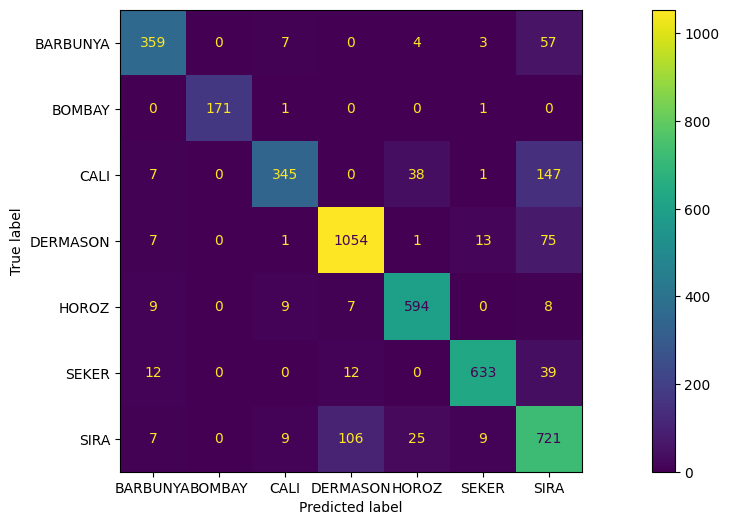

In [88]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(18, 6))
cm_display.plot(ax=ax)
plt.show()
